# Zad 1, 2, 3
Wczytaj zbiór danych Credit Card Default, który zawiera informacje o klientach bankowych,
takie jak saldo, limit kredytowy, płeć, wiek itp. Następnie oczyść dane poprzez usuwanie brakujących wartości i kodowanie zmiennych kategorycznych

Zastosuj algorytm K-means do zgrupowania klientów bankowych na podstawie ich zachowań
finansowych. Podziel klientów na kilka klastrów i zbadaj, jak różnią się między sobą

Wykorzystaj metodę Mean Shift do identyfikacji naturalnych grup w danych Credit Card Default. Porównaj wyniki z algorytmem K-means i przeanalizuj, czy różnią się od siebie.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import numpy as np 

In [3]:
# Wczytanie danych
data = pd.read_csv("data/credit.csv")
target = data['default.payment.next.month']
data.drop('default.payment.next.month', axis='columns')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
# Usuwanie brakujących wartości
data.dropna(inplace=True)

# Usunięcie duplikatów
data.drop_duplicates(inplace=True)

# Usunięcie niepotrzebnych kolumn
data.drop(['ID'], axis=1, inplace=True)

data['PAY'] = data['PAY_0'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6']

data['BILL'] = data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT6'] + data['BILL_AMT6']

data['PAY_AMT'] = data['PAY_AMT1'] + data['PAY_AMT2'] + data['PAY_AMT3'] + data['PAY_AMT4'] + data['PAY_AMT6']

data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis =1, inplace=True)
data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)
data.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1, inplace=True)

data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month,PAY,BILL,PAY_AMT
0,20000.0,2,2,1,24,1,-2,7704.0,689.0
1,120000.0,2,2,2,26,1,3,16883.0,5000.0
2,90000.0,2,2,2,34,0,0,102254.0,10018.0
3,50000.0,2,2,1,37,0,0,231922.0,7319.0
4,50000.0,1,2,1,57,0,-2,109324.0,58360.0
...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,710092.0,37550.0
29996,150000.0,1,3,2,43,0,-4,15992.0,14490.0
29997,30000.0,1,2,2,37,1,8,69271.0,29300.0
29998,80000.0,1,3,1,41,1,-1,303700.0,94217.0


C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


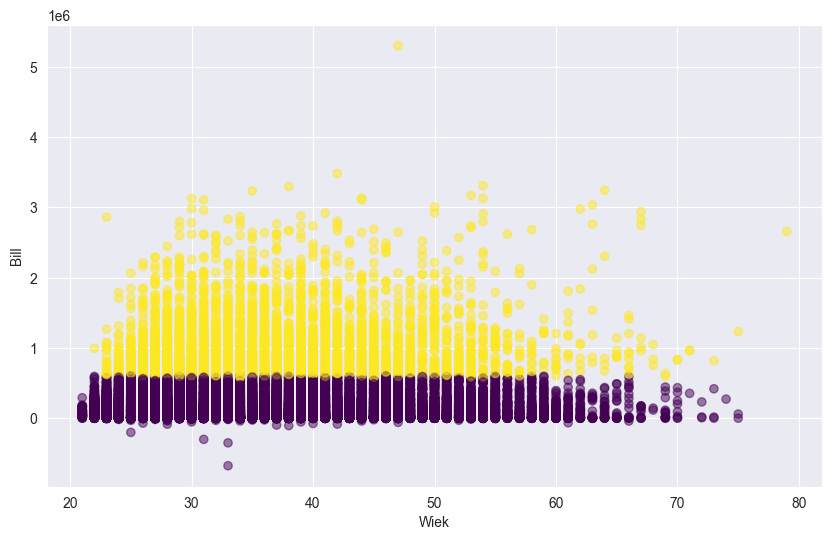

In [5]:
# Inicjalizacja i dopasowanie modelu K-means
k = 2
X = data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
# Przewidywanie przynależności do klastrów dla każdej próbki
labels = kmeans.labels_
# Wyświetlenie wyników
plt.figure(figsize=(10, 6))
plt.scatter(X['AGE'], X['BILL'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel("Wiek")
plt.ylabel("Bill")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.show()

In [6]:
# Implementacja metody Mean Shift
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=ms.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=300,
 edgecolor='k', facecolor='none')
plt.title('Metoda przesunięcia średniej (Mean Shift)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x700 with 0 Axes>